In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os, sys
import h5py
import json

sys.path.append(os.environ['ROOTDIR'])

from sklearn.metrics import confusion_matrix
from core.plots import plot_cm

In [29]:
def get_cm_and_scores(path, name='model'):
    
    with open(os.path.join(path, 'conf.json')) as f:
        conf = json.load(f)
    
    df = pd.read_csv(os.path.join('..','..',conf['data'], 'objects.csv'))
        
    class_names = list(df['index'].values)

    with h5py.File(os.path.join(path, 'test', 'predictions.h5'), "r") as f:
        y_true = f['y_true'][()]
        y_pred = np.argmax(f['y_pred'][()], 1)
    print(np.unique(y_true))
    cm  = confusion_matrix(y_true, y_pred, normalize='true')
    
    with open(os.path.join(path, 'test', 'test_results.json'), 'r') as f:
        metrics = json.load(f)
    
    metrics['title'] = name
    return metrics, cm, class_names

In [30]:
meta_df = pd.read_csv('../../data/raw_data/ztf/dfcrossmatches_ZTF_prioritized_v8.0.1.csv')

In [31]:
metrics_0, cm_0, cls_names_0 = get_cm_and_scores( "../../runs/lstm", name='LSTM')
metrics_1, cm_1, cls_names_1 = get_cm_and_scores( "../../runs/phased", name='PLSTM')

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


In [34]:
class_names = list(pd.read_csv('../../data/records/ztf/objects.csv')['index'].values)[:-1]

['QSO', 'EB/EW', 'LPV', 'RRL', 'EA', 'AGN', 'YSO', 'SNIa', 'RSCVn', 'Blazar', 'DSCT', 'CV/Nova', 'Periodic-Other', 'Ceph', 'NLQSO', 'SNII', 'SNIbc', 'SNIIn', 'SLSN', 'SNIIb', 'NLAGN', 'ZZ']
['QSO', 'EB/EW', 'LPV', 'RRL', 'EA', 'AGN', 'YSO', 'SNIa', 'RSCVn', 'Blazar', 'DSCT', 'CV/Nova', 'Periodic-Other', 'Ceph', 'NLQSO', 'SNII', 'SNIbc', 'SNIIn', 'SLSN', 'SNIIb', 'NLAGN', 'ZZ']


<AxesSubplot:title={'center':'PLSTM'}>

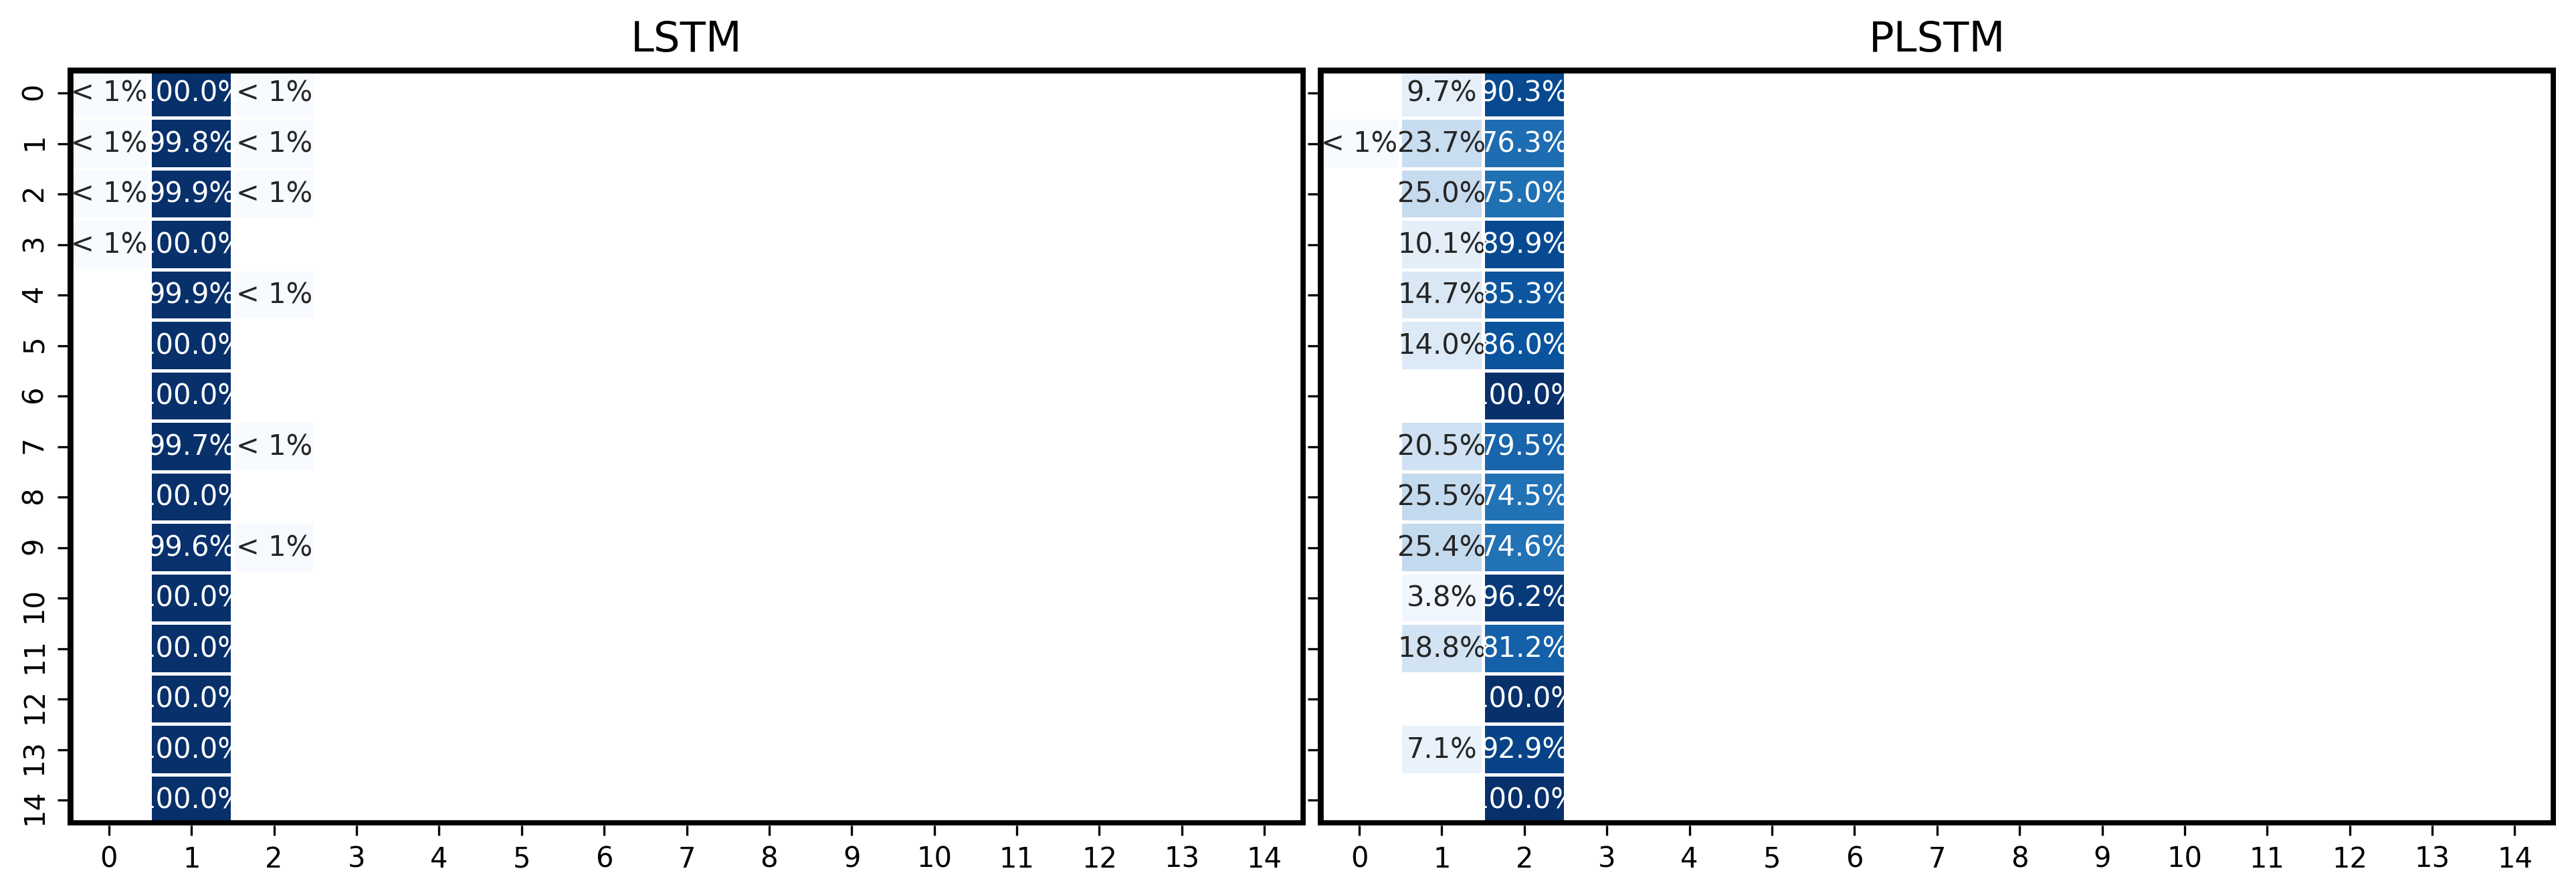

In [35]:
fig, axes = plt.subplots(1,2, figsize=(16,5), sharey=True, gridspec_kw={'hspace': 0.1, 'wspace': 0.01}, dpi=300)

plot_cm(cm_0, axes[0], title=metrics_0['title'], class_names=cls_names_0, fontsize=10)
plot_cm(cm_1, axes[1], title=metrics_1['title'], class_names=cls_names_0, fontsize=10)
# plot_cm(cm_2, axes[2], title=metrics_2['title'], class_names=cls_names_0, fontsize=10)

In [37]:
import pandas as pd

print('Model & F1 & Recall & Precision & Accuracy \\\\\hline')
for dictonary in [metrics_0,metrics_1]:
    print('{} & {:.2f} & {:.2f} & {:.2f} & {:.2f} \\\\\hline '.format(dictonary['title'],
                                                          dictonary['f1'],
                                                          dictonary['recall'],
                                                          dictonary['precision'],
                                                          dictonary['accuracy']))

Model & F1 & Recall & Precision & Accuracy \\\hline
LSTM & 0.03 & 0.07 & 0.06 & 0.27 \\\hline 
PLSTM & 0.04 & 0.07 & 0.04 & 0.26 \\\hline 


In [38]:
metrics_1

{'f1': 0.04307182202980876,
 'recall': 0.06579340275790208,
 'precision': 0.03940627119641108,
 'accuracy': 0.2597979797979798,
 'title': 'PLSTM'}